<a href="https://colab.research.google.com/github/fcp2207/Red-convolucional-miniproyecto-3/blob/main/MINI_PROYECTO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/andrnsgnmez/Red-convolucional-miniproyecto-3.git

fatal: destination path 'Red-convolucional-miniproyecto-3' already exists and is not an empty directory.


In [3]:
# Importar las bibliotecas necesarias hola como estas
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
# Definir el nuevo tamaño de las imágenes
nuevo_ancho, nuevo_alto = 224, 224  # Este tamaño es más manejable y común para CNNs

# Crear un generador de imágenes con redimensionamiento
generador_entrenamiento = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #  normalizar de 0 a 1 y dividir datos para validación
)

# Cargar y transformar imágenes con redimensionamiento entrenamiento
generador_datos_entrenamiento = generador_entrenamiento.flow_from_directory(
    'C:/Users/andres gomez/Downloads/Red-convolucional-miniproyecto-3/IMAGENES',
    target_size=(nuevo_ancho, nuevo_alto),
    batch_size=10,
    class_mode='categorical',
    subset='training'
)
# Cargar y transformar imágenes con redimensionamiento validación
generador_datos_validacion = generador_entrenamiento.flow_from_directory(
    'C:/Users/andres gomez/Downloads/Red-convolucional-miniproyecto-3/IMAGENES',
    target_size=(nuevo_ancho, nuevo_alto),
    batch_size=10,
    class_mode='categorical',
    subset='validation'
)


Found 292 images belonging to 5 classes.


Found 70 images belonging to 5 classes.


In [8]:
# Modelo CNN personalizado
model_custom = Sequential([ # modelo secuencial en Keras
    Conv2D(32, (3,3), activation='relu', input_shape=(nuevo_ancho, nuevo_alto, 3)), # capa convolucional con 32 filtros, un kernel de tamaño 3x3, y función de activación ReLU.
    MaxPooling2D(2, 2), # capa de pooling con un tamaño de ventana de 2x2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model_custom.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #compile: Configura el modelo para el entrenamiento.
#optimizer='adam': Utiliza el optimizador Adam.
#loss='categorical_crossentropy': Define la función de pérdida.
#metrics=['accuracy']: Indica que la precisión (accuracy).


In [9]:
# Cargar MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=(nuevo_alto, nuevo_alto, 3), include_top=False, weights='imagenet')

# Congelar el modelo base
base_model.trainable = False

# Crear modelo sobre la base de MobileNetV2
model_mobilenet = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 clases
])

model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 [==============================] - 3s 0us/step


In [10]:
# Entrenamiento del modelo personalizado
history_custom = model_custom.fit(generador_datos_entrenamiento, validation_data=generador_datos_validacion, epochs=10)

# Entrenamiento del modelo MobileNetV2
history_mobilenet = model_mobilenet.fit(generador_datos_entrenamiento, validation_data=generador_datos_validacion, epochs=10)


Epoch 1/10
30/30 [==============================] - 92s 3s/step - loss: 5.0377 - accuracy: 0.3356 - val_loss: 1.6956 - val_accuracy: 0.2143
Epoch 2/10
30/30 [==============================] - 76s 2s/step - loss: 0.8473 - accuracy: 0.6849 - val_loss: 1.6811 - val_accuracy: 0.4143
Epoch 3/10
30/30 [==============================] - 69s 2s/step - loss: 0.4186 - accuracy: 0.8767 - val_loss: 2.7762 - val_accuracy: 0.4714
Epoch 4/10
30/30 [==============================] - 67s 2s/step - loss: 0.2282 - accuracy: 0.9452 - val_loss: 2.7728 - val_accuracy: 0.4143
Epoch 5/10
30/30 [==============================] - 69s 2s/step - loss: 0.0634 - accuracy: 0.9932 - val_loss: 3.2062 - val_accuracy: 0.3286
Epoch 6/10
30/30 [==============================] - 68s 2s/step - loss: 0.1509 - accuracy: 0.9521 - val_loss: 1.8572 - val_accuracy: 0.5143
Epoch 7/10
30/30 [==============================] - 68s 2s/step - loss: 0.0404 - accuracy: 0.9897 - val_loss: 3.6789 - val_accuracy: 0.4286
Epoch 8/10
30/30 [==

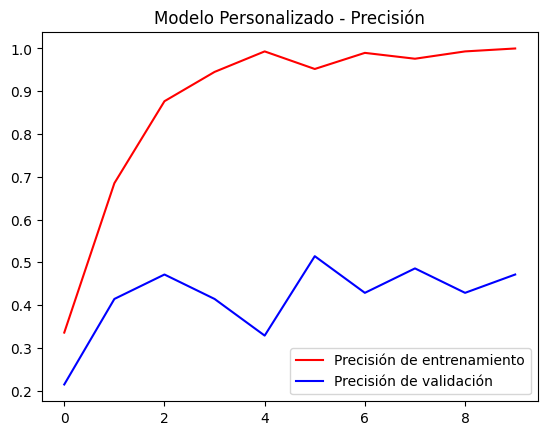

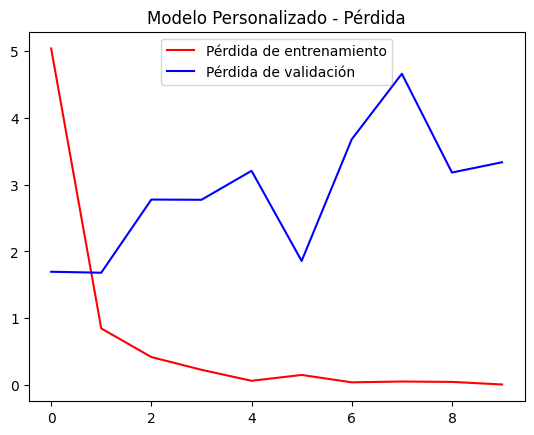

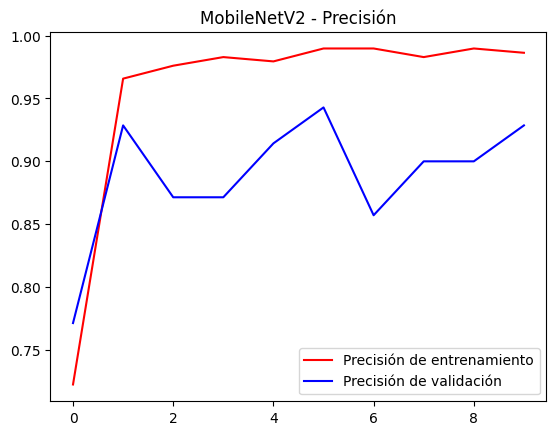

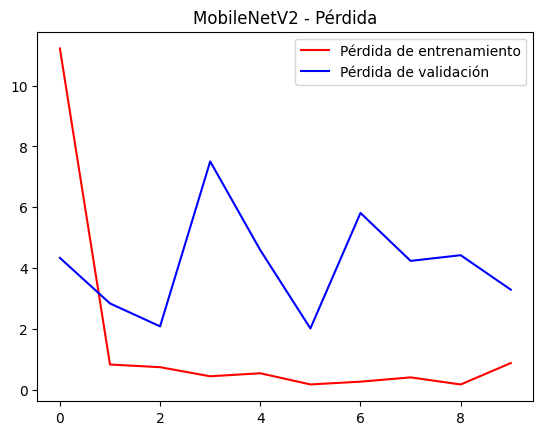

In [11]:
# Función para graficar el rendimiento
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Precisión de entrenamiento')
    plt.plot(epochs, val_acc, 'b', label='Precisión de validación')
    plt.title(title + ' - Precisión')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Pérdida de entrenamiento')
    plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
    plt.title(title + ' - Pérdida')
    plt.legend()

    plt.show()

# Graficar el rendimiento de los modelos
plot_history(history_custom, 'Modelo Personalizado')
plot_history(history_mobilenet, 'MobileNetV2')


In [12]:
# Evaluar y calcular métricas para el modelo personalizado
predictions_custom = model_custom.predict(generador_datos_validacion)
predicted_classes_custom = np.argmax(predictions_custom, axis=1)
true_classes = generador_datos_validacion.classes
class_labels = list(generador_datos_validacion.class_indices.keys())

report_custom = classification_report(true_classes, predicted_classes_custom, target_names=class_labels)
print(report_custom)

# Repetir para el modelo MobileNetV2
predictions_mobilenet = model_mobilenet.predict(generador_datos_validacion)
predicted_classes_mobilenet = np.argmax(predictions_mobilenet, axis=1)

report_mobilenet = classification_report(true_classes, predicted_classes_mobilenet, target_names=class_labels)
print(report_mobilenet)


7/7 [==============================] - 9s 949ms/step
                precision    recall  f1-score   support

Destornillador       0.12      0.07      0.09        14
   Llave mixta       0.16      0.18      0.17        17
      Martillo       0.18      0.23      0.20        13
    Pie de rey       0.18      0.18      0.18        11
        Pinzas       0.27      0.27      0.27        15

      accuracy                           0.19        70
     macro avg       0.18      0.19      0.18        70
  weighted avg       0.18      0.19      0.18        70

7/7 [==============================] - 10s 968ms/step
                precision    recall  f1-score   support

Destornillador       0.17      0.14      0.15        14
   Llave mixta       0.36      0.29      0.32        17
      Martillo       0.27      0.31      0.29        13
    Pie de rey       0.18      0.18      0.18        11
        Pinzas       0.33      0.40      0.36        15

      accuracy                           0.27   